A hepatite é a inflamação do fígado. Pode ser causada por vírus ou pelo uso de alguns remédios, álcool e outras drogas, assim como por doenças autoimunes, metabólicas e genéticas. Em alguns casos, são doenças silenciosas que nem sempre apresentam sintomas.

As hepatites virais são inflamações causadas por vírus que são classificados por letras do alfabeto em A, B, C, D (Delta) e E. No Brasil, mais de 70% (23.070) dos óbitos por hepatites virais são decorrentes da Hepatite C, seguido da Hepatite B (21,8%) e A (1,7%). O país registrou 40.198 casos novos de hepatites virais em 2017.



https://archive.ics.uci.edu/ml/datasets/hepatitis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
#Carregando os dados
data = pd.read_csv('dataset-data-munging-02-hepatite.data')

In [3]:
#Nome das colunas
colunas = ['Class', 'Age', 'Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig',
                'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin','AlkPhosphate', 'SGOT',
                'Albumin', 'Protime', 'Histology']

In [4]:
data.columns = colunas

In [5]:
#Verificando as 5 primeiras linhas
data.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [6]:
#Verificando o numero de linhas nulas
data.isnull().sum()

Class             0
Age               0
Gender            0
Steroid           0
Antivirals        0
Fatigue           0
Malaise           0
Anorexia          0
LiverBig          0
LiverFirm         0
SpleenPalpable    0
Spiders           0
Ascites           0
Varices           0
Bilirubin         0
AlkPhosphate      0
SGOT              0
Albumin           0
Protime           0
Histology         0
dtype: int64

In [7]:
#Substituindo a quantidade de ? no dataset
data.replace('?', np.nan, inplace = True)

In [8]:
data.isnull().sum()

Class              0
Age                0
Gender             0
Steroid            1
Antivirals         0
Fatigue            1
Malaise            1
Anorexia           1
LiverBig          10
LiverFirm         11
SpleenPalpable     5
Spiders            5
Ascites            5
Varices            5
Bilirubin          6
AlkPhosphate      29
SGOT               4
Albumin           16
Protime           66
Histology          0
dtype: int64

In [9]:
#Verificando a quantidade de linhas e colunas
data.shape

(154, 20)

In [10]:
#Verificando a quantidade de valores faltantes em porcentagem
nulos = []
for i in data.columns:
    if data[i].isnull().sum() > 0:
        porc = data[i].isnull().sum()/len(data)
        res = porc*100
        
        print('A porcentagem de valores nulos da coluna {} é de {} %'.format(i,"%.2f" % res))


A porcentagem de valores nulos da coluna Steroid é de 0.65 %
A porcentagem de valores nulos da coluna Fatigue é de 0.65 %
A porcentagem de valores nulos da coluna Malaise é de 0.65 %
A porcentagem de valores nulos da coluna Anorexia é de 0.65 %
A porcentagem de valores nulos da coluna LiverBig é de 6.49 %
A porcentagem de valores nulos da coluna LiverFirm é de 7.14 %
A porcentagem de valores nulos da coluna SpleenPalpable é de 3.25 %
A porcentagem de valores nulos da coluna Spiders é de 3.25 %
A porcentagem de valores nulos da coluna Ascites é de 3.25 %
A porcentagem de valores nulos da coluna Varices é de 3.25 %
A porcentagem de valores nulos da coluna Bilirubin é de 3.90 %
A porcentagem de valores nulos da coluna AlkPhosphate é de 18.83 %
A porcentagem de valores nulos da coluna SGOT é de 2.60 %
A porcentagem de valores nulos da coluna Albumin é de 10.39 %
A porcentagem de valores nulos da coluna Protime é de 42.86 %


In [11]:
#Substituindo os valores faltantes pela mediana, com exceção de  Protime
def imputar_mediana(series):
    return series.fillna(series.median())

In [12]:
for i in data.columns:
    if 0 < data[i].isnull().sum() < 30:
        data[i] = data[i].transform(imputar_mediana)
        

In [13]:
data.isnull().sum()

Class              0
Age                0
Gender             0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
LiverBig           0
LiverFirm          0
SpleenPalpable     0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
AlkPhosphate       0
SGOT               0
Albumin            0
Protime           66
Histology          0
dtype: int64

In [14]:
#Retirar a coluna Protime, pois há muitos dados faltantes
data = data.drop('Protime', axis = 1)

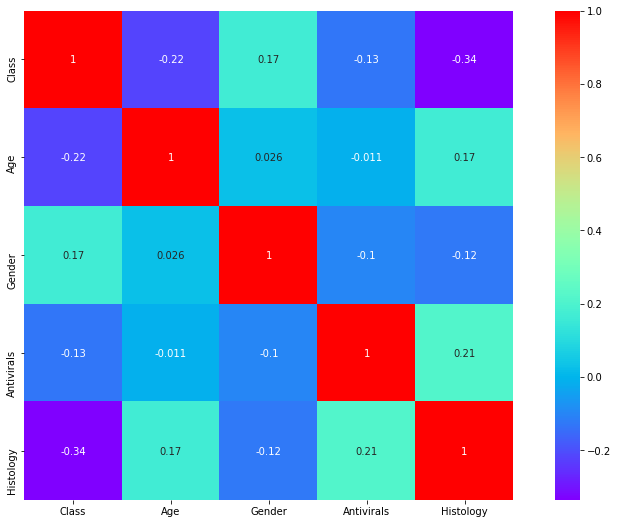

In [15]:
# Cria o mapa de calor com a matriz de correlação
corr = data.corr()
f, ax = plt.subplots(figsize = (15, 9))
sns.heatmap(corr, vmax = 1, square = True,annot = True, cmap = 'rainbow')
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           154 non-null    int64 
 1   Age             154 non-null    int64 
 2   Gender          154 non-null    int64 
 3   Steroid         154 non-null    object
 4   Antivirals      154 non-null    int64 
 5   Fatigue         154 non-null    object
 6   Malaise         154 non-null    object
 7   Anorexia        154 non-null    object
 8   LiverBig        154 non-null    object
 9   LiverFirm       154 non-null    object
 10  SpleenPalpable  154 non-null    object
 11  Spiders         154 non-null    object
 12  Ascites         154 non-null    object
 13  Varices         154 non-null    object
 14  Bilirubin       154 non-null    object
 15  AlkPhosphate    154 non-null    object
 16  SGOT            154 non-null    object
 17  Albumin         154 non-null    object
 18  Histology 

In [17]:
# Variáveis quantitativas
int_cols = ['Age', 
            'Gender', 
            'Steroid',
            'Antivirals',
            'Histology']

In [18]:
# Primeiro filtramos as variáveis do tipo inteiro
dataset_clean = data.drop(int_cols, axis = 1)

In [19]:
# colocamos os valores das variáveis binárias como float
for col in dataset_clean.columns:
    dataset_clean[col] = dataset_clean[col].apply(lambda x: float(x))

In [20]:
# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [21]:
# Lista
categorical_vars = []

# Loop
for column in dataset_clean:
    categorical_vars.append(column)

In [22]:
# Variável alvo
y = 'Class'

# Print
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

# Loop
for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(dataset_clean[var], dataset_clean[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável Class com a variável resposta: 0.9801455662417283
Associação da Variável Fatigue com a variável resposta: 0.2760525460614154
Associação da Variável Malaise com a variável resposta: 0.31218858803824256
Associação da Variável Anorexia com a variável resposta: 0.07841535311048083
Associação da Variável LiverBig com a variável resposta: 0.0
Associação da Variável LiverFirm com a variável resposta: 0.0
Associação da Variável SpleenPalpable com a variável resposta: 0.19750344467573702
Associação da Variável Spiders com a variável resposta: 0.3630260231375749
Associação da Variável Ascites com a variável resposta: 0.4389046973297227
Associação da Variável Varices com a variável resposta: 0.32796109525410116
Associação da Variável Bilirubin com a variável resposta: 0.48038584466196316
Associação da Variável AlkPhosphate com a variável resposta: 0.1933544

In [23]:
#Retiraremos as colunas que não possuem associação com a variável resposta
data = data.drop('LiverBig', axis = 1)
data = data.drop('LiverFirm', axis = 1)
data = data.drop('SGOT', axis = 1)

In [24]:
#Formato 
data.shape

(154, 16)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           154 non-null    int64 
 1   Age             154 non-null    int64 
 2   Gender          154 non-null    int64 
 3   Steroid         154 non-null    object
 4   Antivirals      154 non-null    int64 
 5   Fatigue         154 non-null    object
 6   Malaise         154 non-null    object
 7   Anorexia        154 non-null    object
 8   SpleenPalpable  154 non-null    object
 9   Spiders         154 non-null    object
 10  Ascites         154 non-null    object
 11  Varices         154 non-null    object
 12  Bilirubin       154 non-null    object
 13  AlkPhosphate    154 non-null    object
 14  Albumin         154 non-null    object
 15  Histology       154 non-null    int64 
dtypes: int64(5), object(11)
memory usage: 19.4+ KB


In [26]:
#Transformar em float
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors = 'coerce')

In [27]:
#transformar os valores 2 e 1 em 1 e 0

data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']] = data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']].apply(pd.Series.replace, to_replace = 1, value = 0)

data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']] = data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']].apply(pd.Series.replace, to_replace = 2, value = 1)

In [28]:
data.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Albumin,Histology
0,1,50,0,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,3.5,0
1,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,4.0,0
2,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,4.0,0
3,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,4.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,4.0,0


<AxesSubplot:xlabel='Class', ylabel='count'>

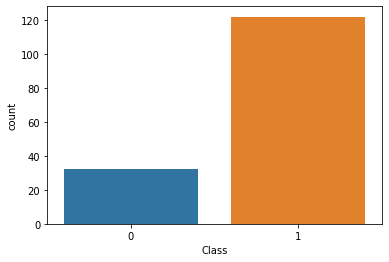

In [29]:
#Verificando o balanceamento da variável target
sns.countplot(data['Class'])

In [30]:
X = data.drop('Class', axis = 1)
y = data.Class
# Aplica a divisão com proporção 80/20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [31]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape 

((123, 15), (31, 15), (123,), (31,))

In [32]:
# Seed para reproduzir o mesmo resultado
seed = 100


# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X_treino, y_treino)

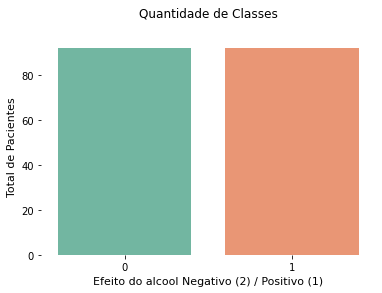

In [33]:
#Verificando o balanceamento da variável target
sns.countplot(y_res, palette="Set2")
plt.box(False)
plt.xlabel("Efeito do alcool Negativo (2) / Positivo (1)", fontsize = 11)
plt.ylabel("Total de Pacientes", fontsize = 11)
plt.title("Quantidade de Classes\n")
plt.show()

In [34]:
# Vamos padronizar as variáveis de entrada

# Cria o padronizador
scaler = StandardScaler()

# Treina e aplica nos dados de treino
X_treino_scaled = scaler.fit_transform(X_res.values)

# Apenas aplica nos dados de teste
X_teste_scaled = scaler.transform(X_teste.values)

## V1 - Regressão Logística

In [35]:
modelo_v1 = sm.Logit(y_res,X_treino_scaled)
modelo_v1_treino = modelo_v1.fit()
#Utilizando o relatório do Statsmodel para análise
print(modelo_v1_treino.summary())

Optimization terminated successfully.
         Current function value: 0.250490
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  184
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                           14
Date:                Mon, 07 Sep 2020   Pseudo R-squ.:                  0.6386
Time:                        13:29:08   Log-Likelihood:                -46.090
converged:                       True   LL-Null:                       -127.54
Covariance Type:            nonrobust   LLR p-value:                 1.853e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9223      0.334     -2.761      0.006      -1.577      -0.268
x2             1.5773      0.

# V2 - Random Forest - Importância dos Atributos

In [36]:
# Cria o modelo
modelo_rfc = RandomForestClassifier()

In [37]:
# Treina o modelo
modelo_rfc.fit(X_treino_scaled, y_res)

RandomForestClassifier()

In [38]:
# Cria um dataframe com os resultados
resultado_modelo_rfc = pd.DataFrame()
resultado_modelo_rfc['Atributo'] = X_treino.columns
resultado_modelo_rfc['Score'] = modelo_rfc.feature_importances_
resultado_modelo_rfc.sort_values('Score', inplace = True, ascending = False)

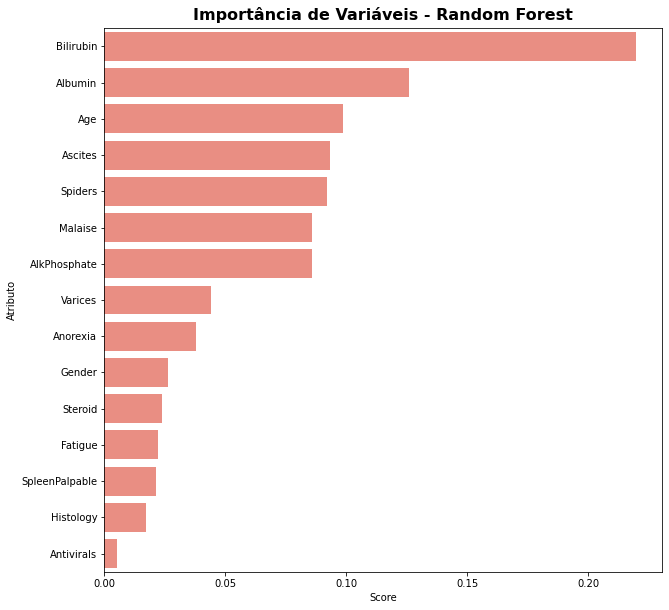

In [39]:
# Plot
plt.figure(figsize = (10, 10))
sns.set_color_codes("pastel")
sns.barplot(x = 'Score', y = 'Atributo', data = resultado_modelo_rfc, color = "salmon")
plt.title('Importância de Variáveis - Random Forest', fontsize = 16, fontweight = 'bold', pad = 8)
plt.savefig('RF.png', format='png')
plt.show()

In [40]:
# Previsões
previsoes_v2 = modelo_rfc.predict(X_teste_scaled)
matriz_v2 = confusion_matrix(y_teste, previsoes_v2)
print(matriz_v2)

[[ 0  1]
 [ 4 26]]


In [42]:
# Score AUC
print(roc_auc_score(y_teste, previsoes_v2))

0.43333333333333335


## V3 - Adaboost

In [ ]:
#Cria o modelo
ab = AdaBoostClassifier(random_state = 123)

# Grid de parâmetros
gridparam_ab = {'n_estimators': [100,200,500], 'learning_rate': [0.2,0.5,1.0],}

# Grid Search
modelo_ab = GridSearchCV(ab, cv = 3, param_grid = gridparam_ab)

# Treinamento com Grid Search
modelo_ab.fit(X_treino_scaled, Y_treino)

# Previsões de classe
ab_Y_pred = modelo_ab.predict(X_teste_scaled)

# Previsões de probabilidade
ab_predict_proba = modelo_ab.predict_proba(X_teste_scaled)[:,1] 